### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#missings
hr_df.isnull().any().sum()

0

In [6]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [7]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [8]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [9]:
for c_feature in categorical_features:
    hr_df = create_dummies( hr_df, c_feature )

In [10]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
#feature_columns1 = feature_columns

In [12]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [14]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
logreg.predict(train_X)   #by default, it use cut-off as 0.5

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
logreg.predict_proba(train_X)

array([[0.35269745, 0.64730255],
       [0.97423455, 0.02576545],
       [0.46976005, 0.53023995],
       ...,
       [0.8957553 , 0.1042447 ],
       [0.74857505, 0.25142495],
       [0.83504888, 0.16495112]])

In [17]:
logreg.coef_

array([[-1.47274242,  0.00478214, -0.62127042,  0.15453057,  0.37327802,
        -0.33877881,  0.18732726,  0.04770847,  0.10244389,  0.1143843 ,
         0.20996183,  0.55294744, -0.29274894, -1.16425872,  1.84209907,
         1.32324325, -4.10265564,  0.26417692]])

In [18]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4727424218599534),
 ('average_montly_hours', 0.004782140851910285),
 ('department_RandD', -0.6212704238301496),
 ('department_accounting', 0.15453057057028596),
 ('department_hr', 0.37327801901801094),
 ('department_management', -0.33877880905294333),
 ('department_marketing', 0.18732726388115822),
 ('department_product_mng', 0.04770847400059346),
 ('department_sales', 0.1024438897813377),
 ('department_support', 0.11438430164810416),
 ('department_technical', 0.20996183424082104),
 ('last_evaluation', 0.5529474399635106),
 ('number_project', -0.2927489446568348),
 ('promotion_last_5years_1', -1.1642587185550224),
 ('salary_low', 1.842099067619906),
 ('salary_medium', 1.3232432509218321),
 ('satisfaction_level', -4.10265563875651),
 ('time_spend_company', 0.26417691846549857)]

In [19]:
logreg.intercept_

array([-1.53981491])

In [20]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [21]:

hr_test_pred = hr_test_pred.reset_index()

In [22]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
1899,10543,0,0
1908,46,1,0
770,4043,0,0
2425,13088,0,0
1529,13249,0,0
2047,12142,1,1
4231,3884,0,0
2251,10728,0,0
1429,13489,0,0
1607,9630,0,0


In [23]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 351,  721],
       [ 255, 3173]], dtype=int64)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

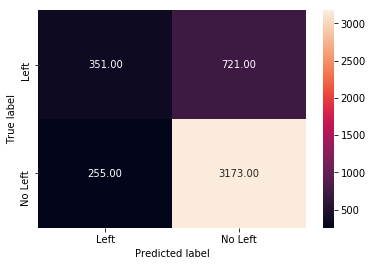

In [25]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [26]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [27]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

      Work_accident_1  average_montly_hours  department_RandD  \
6723                1                   226                 0   

      department_accounting  department_hr  department_management  \
6723                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6723                     1                       0                 0   

      department_support  department_technical  last_evaluation  \
6723                   0                     0             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                        0           0              1   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[0.97047392 0.02952608]]


The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [28]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.970474,0.029526
1,0.918471,0.081529
2,0.770428,0.229572
3,0.518490,0.481510
4,0.975083,0.024917


In [29]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [30]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [31]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.82

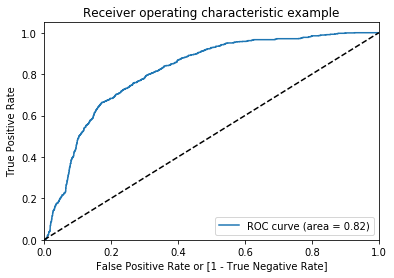

In [33]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.91819505 0.91819505 0.90340088 0.88441894 0.88264706 0.87956549
 0.86934367 0.86900773 0.86844041 0.86430086]
[0.         0.00058343 0.00087515 0.00116686 0.00145858 0.00175029
 0.00204201 0.00233372 0.00262544 0.00291715]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [36]:
round( float( cutoff_prob ), 2 )

0.29

In [37]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.29 else 0 )

In [38]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.970474,0.029526,0
1,6473,0,0,0.918471,0.081529,0
2,4679,0,0,0.770428,0.229572,0
3,862,1,0,0.518490,0.481510,1
4,7286,0,0,0.975083,0.024917,0
5,8127,0,0,0.725038,0.274962,0
6,3017,0,0,0.985036,0.014964,0
7,3087,0,1,0.131560,0.868440,1
8,6425,0,0,0.766019,0.233981,0
9,2250,0,1,0.401986,0.598014,1


Text(0.5,15,'Predicted label')

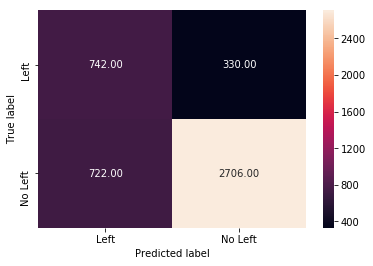

In [39]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Decision Tree Model

In [40]:
import sklearn.tree as dt

In [41]:
dir(dt)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'tree']

In [42]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [43]:
DecisionTreeClassifier?

In [44]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree=clf_tree.fit( train_X, train_y )

In [45]:
clf_tree.predict_proba(train_X)

array([[0.        , 1.        ],
       [0.98673783, 0.01326217],
       [0.02836231, 0.97163769],
       ...,
       [0.98673783, 0.01326217],
       [0.13409415, 0.86590585],
       [0.98673783, 0.01326217]])

In [46]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.000000,1.000000
1,0.986738,0.013262
2,0.028362,0.971638
3,0.986738,0.013262
4,0.134094,0.865906


In [47]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1]

0        1.000000
1        0.013262
2        0.971638
3        0.013262
4        0.865906
5        1.000000
6        0.013262
7        0.971638
8        0.971638
9        0.013262
10       0.013262
11       0.067044
12       0.971638
13       0.013262
14       1.000000
15       0.067044
16       0.013262
17       0.013262
18       0.013262
19       0.039474
20       0.013262
21       0.021505
22       0.014894
23       0.013262
24       0.013262
25       0.013262
26       0.013262
27       0.014894
28       0.013262
29       1.000000
           ...   
10469    0.013262
10470    0.013262
10471    0.971638
10472    0.013262
10473    0.013262
10474    0.013262
10475    0.013262
10476    0.013262
10477    0.865906
10478    0.013262
10479    0.971638
10480    0.865906
10481    0.013262
10482    0.013262
10483    0.013262
10484    0.067044
10485    0.865906
10486    0.013262
10487    0.013262
10488    0.013262
10489    0.971638
10490    0.013262
10491    0.013262
10492    0.014894
10493    0

In [48]:
#note: you need to define the cut-off based on the sensitivity, specicicity, accuracy to decide 1's & 0's

In [49]:
tree_train_pred_prob = pd.DataFrame( { 'actual':  train_y,
                            'predicted': pd.DataFrame(clf_tree.predict_proba(train_X), index=train_y.index)[1] } )

In [50]:
tree_train_pred_prob.head()

,actual,predicted
12602,1,1.000000
4889,0,0.013262
1572,1,0.971638
13375,0,0.013262
879,1,0.865906


In [51]:
metrics.roc_auc_score(tree_train_pred_prob.actual,tree_train_pred_prob.predicted)

0.9730442927170869

In [52]:
2*(metrics.roc_auc_score(tree_train_pred_prob.actual,tree_train_pred_prob.predicted))-1

0.9460885854341738

In [53]:
tree_test_pred_prob = pd.DataFrame( { 'actual':  test_y,
                            'predicted': pd.DataFrame(clf_tree.predict_proba(test_X), index=test_y.index)[1] } )

tree_test_pred_prob.head()

metrics.roc_auc_score(tree_test_pred_prob.actual,tree_test_pred_prob.predicted)

0.968738979040039

In [54]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [55]:
tree_train_pred.head(10)

,actual,predicted
12602,1,1
4889,0,0
1572,1,1
13375,0,0
879,1,1
1578,1,1
8765,0,0
1509,1,1
1896,1,1
4520,0,0


In [56]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [57]:
tree_test_pred.head(10)

,actual,predicted
6723,0,0
6473,0,0
4679,0,0
862,1,1
7286,0,0
8127,0,0
3017,0,0
3087,0,0
6425,0,0
2250,0,0


In [58]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9710448614153729

In [59]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.964

In [60]:
train_y.value_counts()

0    8000
1    2499
Name: left, dtype: int64

Text(0.5,15,'Predicted label')

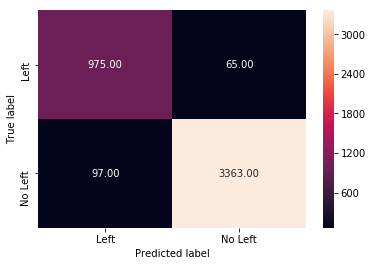

In [61]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [62]:
print(metrics.classification_report(tree_train_pred.actual,tree_train_pred.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8000
           1       0.95      0.93      0.94      2499

   micro avg       0.97      0.97      0.97     10499
   macro avg       0.96      0.96      0.96     10499
weighted avg       0.97      0.97      0.97     10499



In [63]:
print(metrics.classification_report(tree_test_pred.actual,tree_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3428
           1       0.94      0.91      0.92      1072

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [64]:
predict_proba_df.head()

,0,1
0,0.970474,0.029526
1,0.918471,0.081529
2,0.770428,0.229572
3,0.518490,0.481510
4,0.975083,0.024917


In [65]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train_X ) )

In [66]:
predict_proba_df.columns= ['left_0', 'left_1']

In [67]:
predict_proba_df.head()

,left_0,left_1
0,0.000000,1.000000
1,0.986738,0.013262
2,0.028362,0.971638
3,0.986738,0.013262
4,0.134094,0.865906


In [68]:
metrics.roc_auc_score(train_y,predict_proba_df.left_1 )

0.9730442927170869

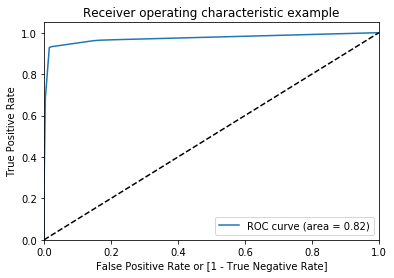

In [69]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( train_y,
                                     predict_proba_df.left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Fine Tuning the parameters

In [70]:
GridSearchCV?

In [71]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,10)}

In [72]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring='roc_auc')
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [73]:
tree.best_score_

0.9785176741591575

In [74]:
tree.best_params_

{'max_depth': 8, 'max_features': 8}

In [75]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [76]:
metrics.roc_auc_score(train_y, pd.DataFrame(tree.predict_proba(train_X))[1])

0.9899861694677871

In [77]:
metrics.roc_auc_score(test_y, pd.DataFrame(tree.predict_proba(test_X))[1])

0.980623111470071

In [78]:
train_pred = tree.predict(train_X)

In [79]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8000
           1       0.99      0.93      0.96      2499

   micro avg       0.98      0.98      0.98     10499
   macro avg       0.98      0.96      0.97     10499
weighted avg       0.98      0.98      0.98     10499



In [80]:
test_pred = tree.predict(test_X)

In [81]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.98      0.91      0.94      1072

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.98      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



### Building Final Decision Tree Model

In [82]:
clf_tree = DecisionTreeClassifier( max_depth = 9, max_features=6 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Feature Importance

In [83]:
train_X.columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [84]:
clf_tree.feature_importances_

array([2.14035536e-03, 6.59644661e-02, 4.49151137e-04, 3.61539316e-05,
       6.09588552e-04, 0.00000000e+00, 5.00967691e-05, 0.00000000e+00,
       6.17529238e-04, 2.64047731e-03, 1.56059396e-03, 1.36660883e-01,
       2.08312014e-01, 2.87222901e-04, 1.22652850e-03, 1.24161391e-03,
       4.02828233e-01, 1.75375092e-01])

In [85]:
var_imp = pd.concat([pd.Series(train_X.columns), pd.Series(clf_tree.feature_importances_)], axis=1)
var_imp.columns = ['feature', 'importance']

In [86]:
var_imp.sort_values('importance', ascending=False)

,feature,importance
16,satisfaction_level,0.402828
12,number_project,0.208312
17,time_spend_company,0.175375
11,last_evaluation,0.136661
1,average_montly_hours,0.065964
9,department_support,0.002640
0,Work_accident_1,0.002140
10,department_technical,0.001561
15,salary_medium,0.001242
14,salary_low,0.001227


In [87]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('Work_accident_1', 0.002140355362435128),
 ('average_montly_hours', 0.06596446613624195),
 ('department_RandD', 0.0004491511372548827),
 ('department_accounting', 3.615393161870749e-05),
 ('department_hr', 0.0006095885518228578),
 ('department_management', 0.0),
 ('department_marketing', 5.009676905062465e-05),
 ('department_product_mng', 0.0),
 ('department_sales', 0.0006175292375650858),
 ('department_support', 0.0026404773078760745),
 ('department_technical', 0.0015605939597708716),
 ('last_evaluation', 0.13666088348988129),
 ('number_project', 0.20831201436291266),
 ('promotion_last_5years_1', 0.00028722290119306316),
 ('salary_low', 0.0012265284995516136),
 ('salary_medium', 0.0012416139084871012),
 ('satisfaction_level', 0.4028282328652031),
 ('time_spend_company', 0.17537509157913506)]

In [88]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [89]:
tree_test_pred.sample( n = 10 )

,actual,predicted
3487,0,0
447,1,1
2442,0,0
3680,0,0
1493,1,1
1579,1,0
12565,1,0
11558,0,0
11281,0,0
1944,1,1


In [90]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9722222222222222

Text(0.5,15,'Predicted label')

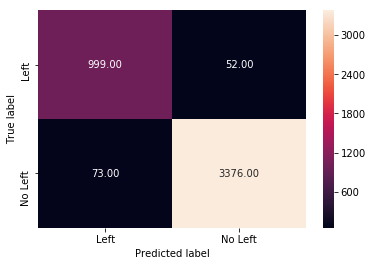

In [91]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Generate Rules from Decision Trees

#### To create a decision tree visualization graph.
- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus
- Add the path to environmental variables
- Note: The notebook needs a restart.

In [92]:
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [94]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "hr_tree.odt",
              feature_names = train_X.columns )

In [95]:
# Converting open document file to jpg imanage

import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [96]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

True

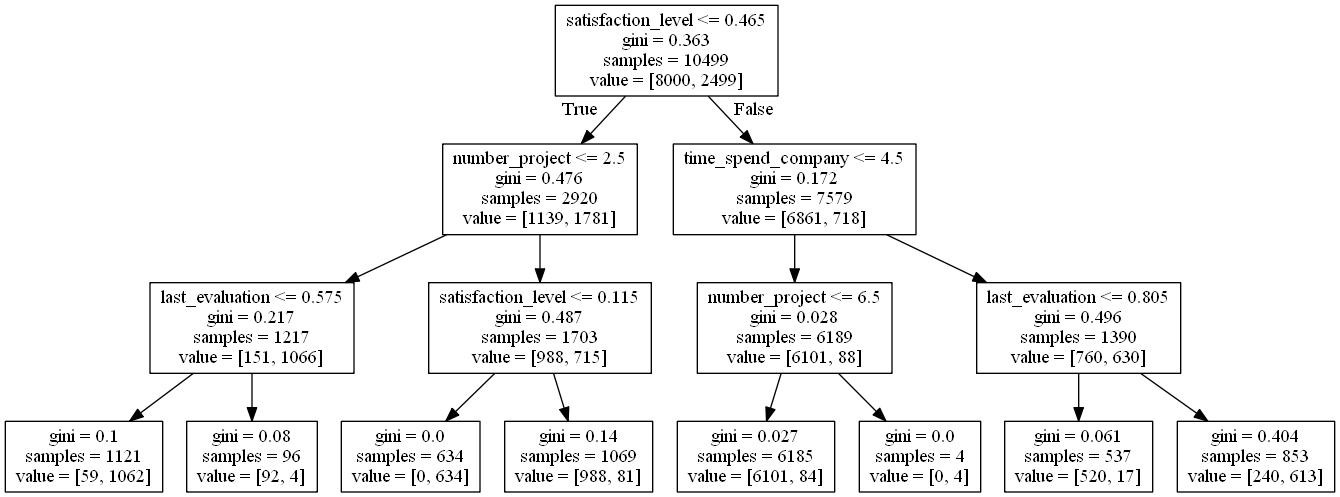

In [97]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='hr_tree.jpg')

---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

---
Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

---
# Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

In [ ]:
from IPython.display import Image
Image(filename='crowdflower_ensembling.jpg')

## Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

# Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

---
**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

In [98]:
import sklearn.ensemble as en

In [99]:
dir(en)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

### Bagged decision trees (with B=10)

In [100]:
from sklearn.ensemble import BaggingClassifier

In [101]:
BaggingClassifier?

In [102]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100, verbose=True, n_jobs=-1)
bagclm.fit(train_X, train_y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.3s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
         verbose=True, warm_start=False)

In [103]:
bagclm.predict(train_X)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished


array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [104]:
bagclm.oob_score_

0.9891418230307648

In [105]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


In [106]:
bagclm.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0

In [107]:
metrics.accuracy_score( y_pred.actual, y_pred.predicted )

0.9862222222222222

Text(0.5,15,'Predicted label')

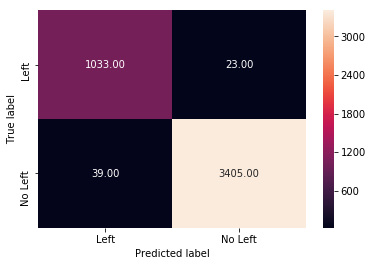

In [108]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

----
## Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validation**!

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [109]:
pargrid_bagging = {'n_estimators': [50, 60, 70, 80, 90, 100]}

from sklearn.model_selection import GridSearchCV
gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_bagging, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [110]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.9s finished


In [111]:
gscv_results.best_params_

{'n_estimators': 70}

In [112]:
gscv_results.best_score_

0.9879988570340033

## Estimating feature importance

Bagging increases **predictive accuracy**, but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** calculate the total amount that **Gini index** is decreased due to splits over a given feature, averaged over all trees

# BUILDING RANDOM FOREST MODEL

Random Forests is a **slight variation of bagged trees** that has even better performance:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

## Comparing Random Forests with decision trees

**Advantages of Random Forests:**

- Performance is competitive with the best supervised learning methods
- Provides a more reliable estimate of feature importance
- Allows you to estimate out-of-sample error without using train/test split or cross-validation

**Disadvantages of Random Forests:**

- Less interpretable
- Slower to train
- Slower to predict

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [116]:
radm_clf.n_features_

18

In [117]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [118]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9875555555555555

Text(0.5,15,'Predicted label')

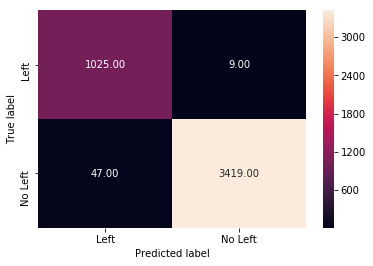

In [119]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [120]:
radm_clf.feature_importances_

array([0.00519363, 0.13894512, 0.00138756, 0.00143409, 0.00139005,
       0.00158108, 0.00096891, 0.00076296, 0.00283074, 0.00196656,
       0.00352644, 0.11102446, 0.16327715, 0.00105176, 0.00582071,
       0.00317714, 0.36711804, 0.18854359])

In [121]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

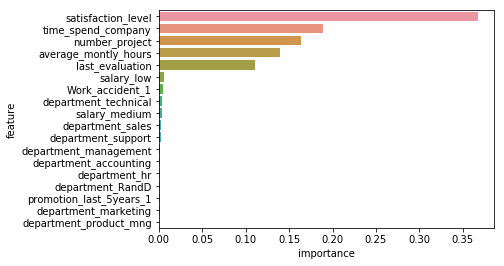

In [122]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b> Note: </b>
As per the model, the most important features which influence whether to leave the company,in descending order, are

- satisfaction_level
- number_project
- time_spend_company
- last_evaluation
- average_montly_hours
- work_accident

In [123]:
pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],
                  'max_features': [5,6,7,8,9,10]}

gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


In [124]:
gscv_results.best_params_

{'max_features': 7, 'n_estimators': 80}

In [125]:
gscv_results.best_score_

0.9898085531955424

### Boosting

#### Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
AdaBoostClassifier?

In [ ]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [ ]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
gscv_ada.fit(train_X, train_y)

In [ ]:
gscv_ada.best_params_

In [ ]:
clf_ada = gscv_ada.best_estimator_

In [ ]:
gscv_ada.best_score_

In [ ]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=800)
ad.fit(train_X, train_y )

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
print(pd.Series(cross_val_score(clf_ada, train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

print(pd.Series(cross_val_score(clf_ada, test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']])

In [ ]:
#Graidient Boost Classifier

In [115]:
import sklearn.naive_bayes as nb

In [116]:
dir(nb)

['ABCMeta',
 'BaseDiscreteNB',
 'BaseEstimator',
 'BaseNB',
 'BernoulliNB',
 'ClassifierMixin',
 'GaussianNB',
 'LabelBinarizer',
 'MultinomialNB',
 '_ALPHA_MIN',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_partial_fit_first_call',
 'abstractmethod',
 'binarize',
 'check_X_y',
 'check_array',
 'check_consistent_length',
 'check_is_fitted',
 'issparse',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'six',
 'warnings']

In [118]:
train_X.head()

,Work_accident_1,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,satisfaction_level,time_spend_company
12602,0,250,0,0,0,0,0,1,0,0,0,0.84,7,0,1,0,0.10,4
4889,1,154,0,0,0,1,0,0,0,0,0,0.68,4,0,0,1,0.57,3
1572,0,154,0,0,0,0,0,0,0,0,1,0.48,2,0,1,0,0.39,3
13375,0,132,0,0,0,0,0,0,0,0,0,0.68,4,0,0,1,0.91,4
879,0,263,0,0,0,0,0,0,0,0,1,0.97,5,0,0,1,0.82,5


In [ ]:
#XGBOOST

In [126]:
import xgboost as xg

In [127]:
dir(xg)

['Booster',
 'DMatrix',
 'VERSION_FILE',
 'XGBClassifier',
 'XGBModel',
 'XGBRanker',
 'XGBRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'callback',
 'compat',
 'core',
 'cv',
 'f',
 'libpath',
 'os',
 'plot_importance',
 'plot_tree',
 'plotting',
 'rabit',
 'sklearn',
 'to_graphviz',
 'train',
 'training']

In [128]:
from xgboost import XGBClassifier

In [129]:
XGBClassifier?

In [130]:
xgb_clf = XGBClassifier(n_estimators=50)

In [132]:
xgb_clf.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [134]:
xgb_clf.predict(train_X)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [135]:
metrics.accuracy_score(train_y, xgb_clf.predict(train_X))

0.9744737594056577

In [119]:
### Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [130]:
nb_clf = MultinomialNB()
nb_clf.fit(train_X,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [131]:
nb_clf.predict_proba(train_X)

array([[0.64481859, 0.35518141],
       [0.96531282, 0.03468718],
       [0.66247805, 0.33752195],
       ...,
       [0.81361908, 0.18638092],
       [0.67946797, 0.32053203],
       [0.70801383, 0.29198617]])

0.7617777777777778

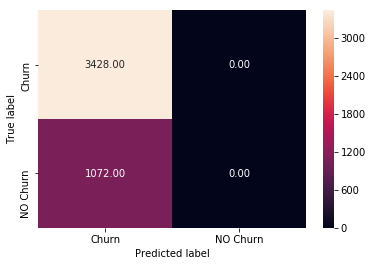

In [132]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X ) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "NO Churn"] , yticklabels = ["Churn", "NO Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

In [133]:
# KNN

In [134]:
import sklearn.neighbors as knn

In [107]:
#### KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [ ]:
#knn_clf = KNeighborsClassifier(n_neighbors=5)
#knn_clf.fit(train_X, train_y )

KNeighborsClassifier?

In [109]:
KNeighborsClassifier?

In [110]:
#with one tuning parameter

tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11, 13,15,17,19,21], 'weights': ['uniform', 'distance']}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

knn_clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [111]:
knn_clf.best_score_

0.9520906753024098

In [112]:
knn_clf.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [113]:
knn_clf.predict(train_X)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
knn_clf.predict_proba(train_X)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

0.9533333333333334

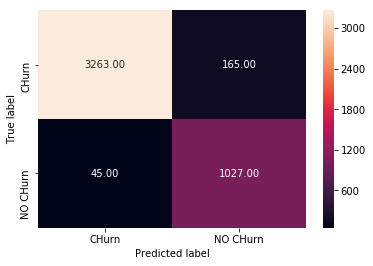

In [115]:
#Prediction
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )


sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["CHurn", "NO CHurn"] , yticklabels = ["CHurn", "NO CHurn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

# SVM

In [14]:
from sklearn.svm import SVC 

In [1]:
from sklearn.model_selection import GridSearchCV

In [21]:
?SVC

In [22]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
             'kernel':['rbf','poly']}

In [ ]:
svm_clf = GridSearchCV(SVC(),
                   param_grid,
                   cv=5,
                   scoring='accuracy')

svm_clf.fit(train_X, train_y )

In [111]:
svm_clf.best_score_

0.9520906753024098

In [112]:
svm_clf.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [113]:
svm_clf.predict(train_X)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
svm_clf.predict_proba(train_X)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

0.9533333333333334

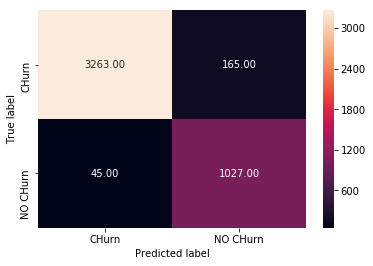

In [115]:
#Prediction
svm_cm = metrics.confusion_matrix( test_y, svm_clf.predict( test_X ) )


sn.heatmap(svm_cm, annot=True,  fmt='.2f', xticklabels = ["CHurn", "NO CHurn"] , yticklabels = ["CHurn", "NO CHurn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

metrics.accuracy_score( test_y, svm_clf.predict( test_X ) )